In [1]:
#11/10/24 the conglomerated graph creating script
import pandas as pd
import numpy as np
import re
import os

datasets = []
modelindex = []
directory = '/Users/james/Documents/Honours/Results/conglomdata/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datalist = df['Dataset'].values
        df = df.drop(['Dataset'], axis = 1)
        df.index = datalist
        datasets.append(df)
        namelist.append(filename[:-4])
index = ['SVM', 'RF', 'KNN', 'NN']
colors = ['#648FFF', '#FE6100', '#785EF0', '#FFB000', '#DC267F']

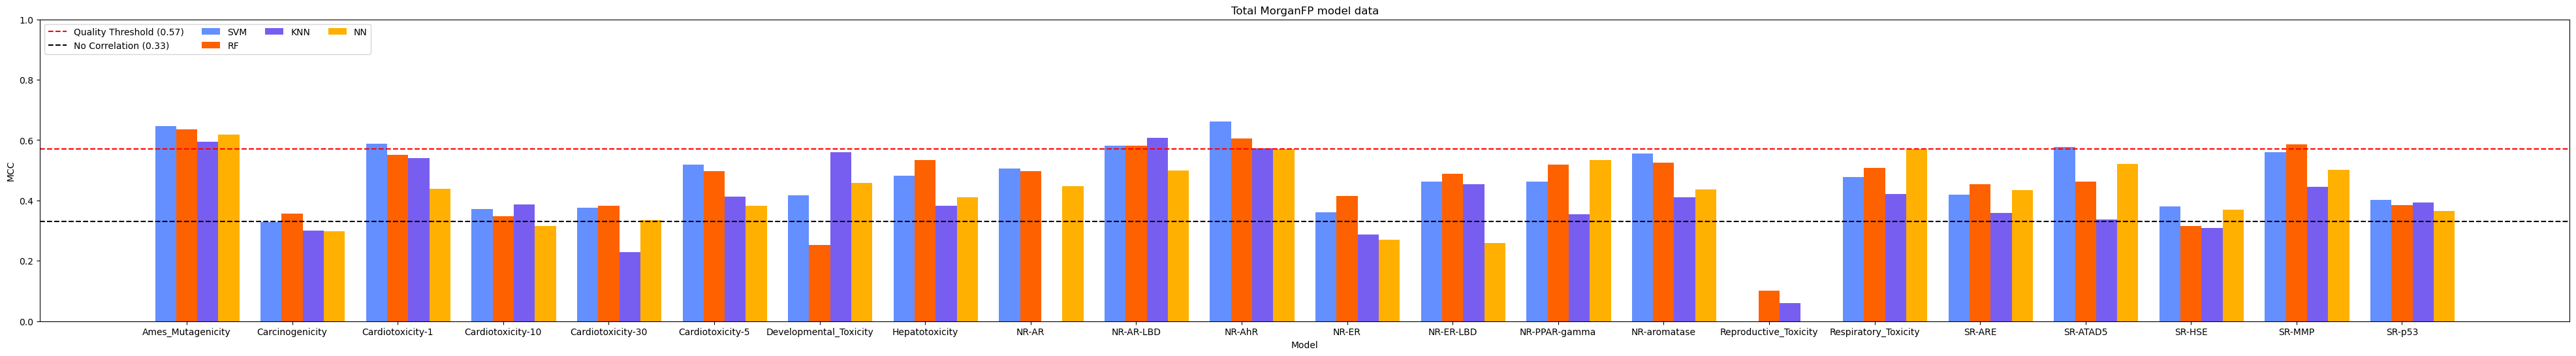

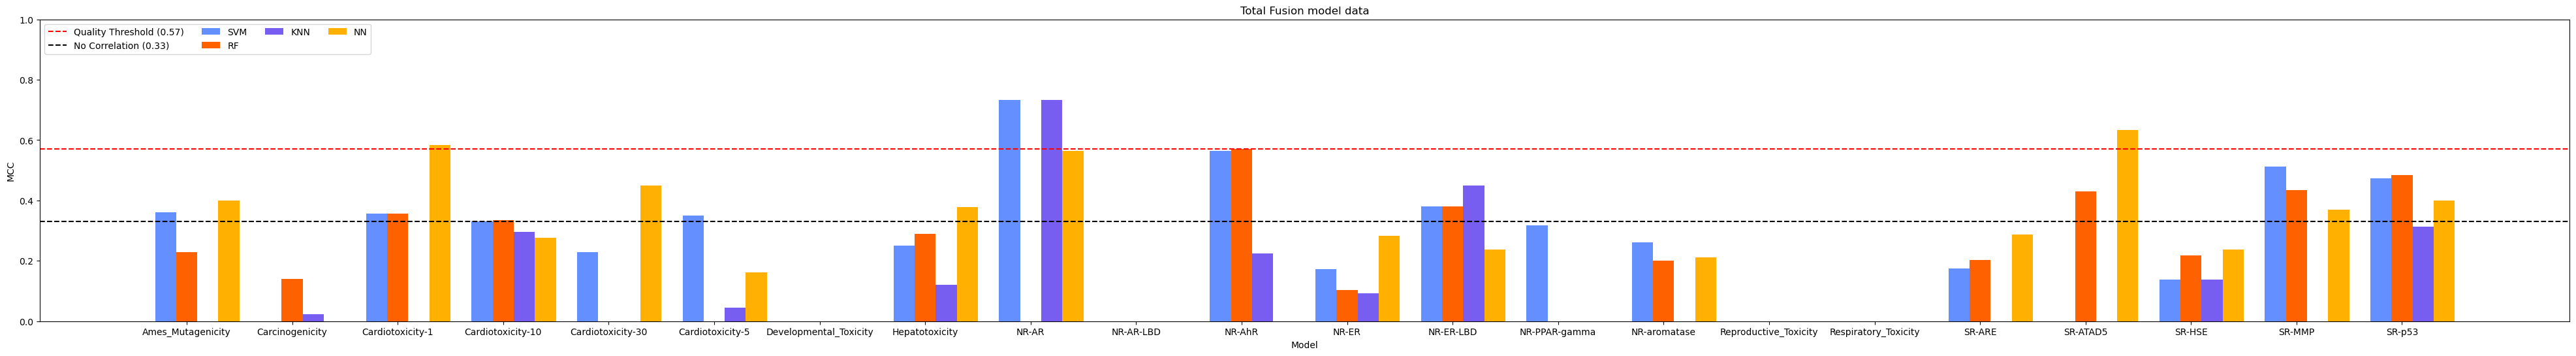

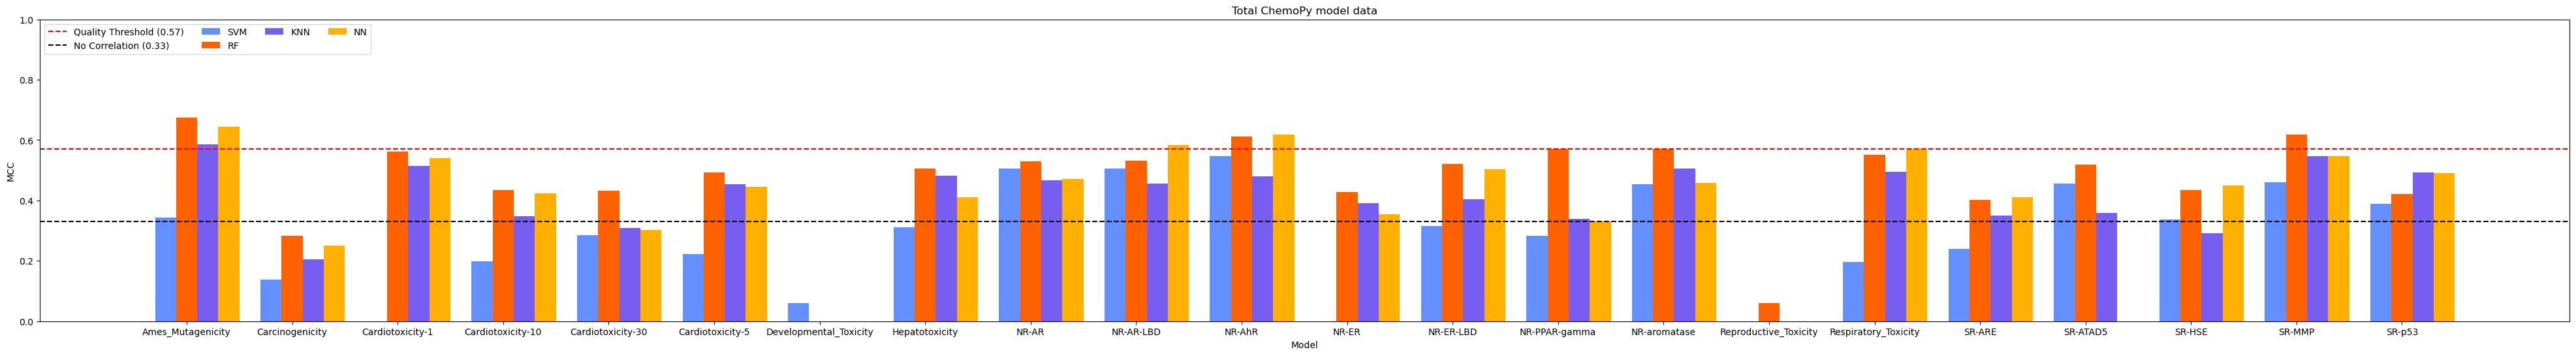

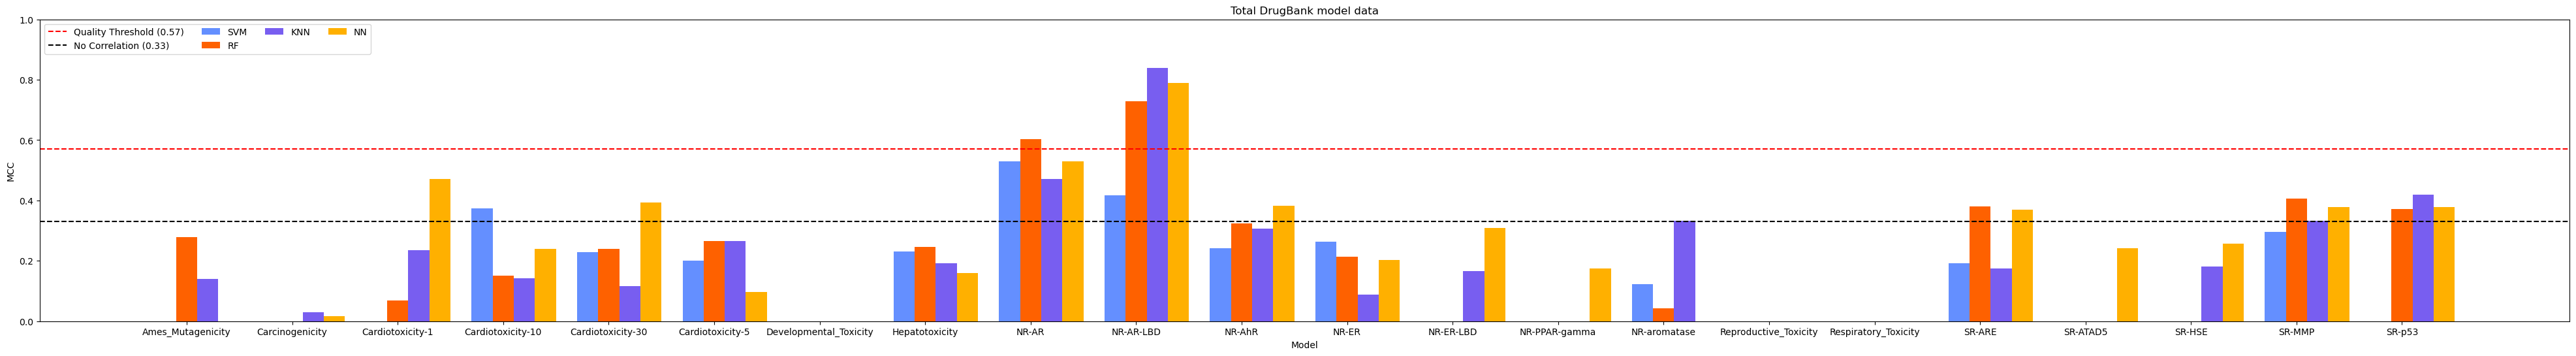

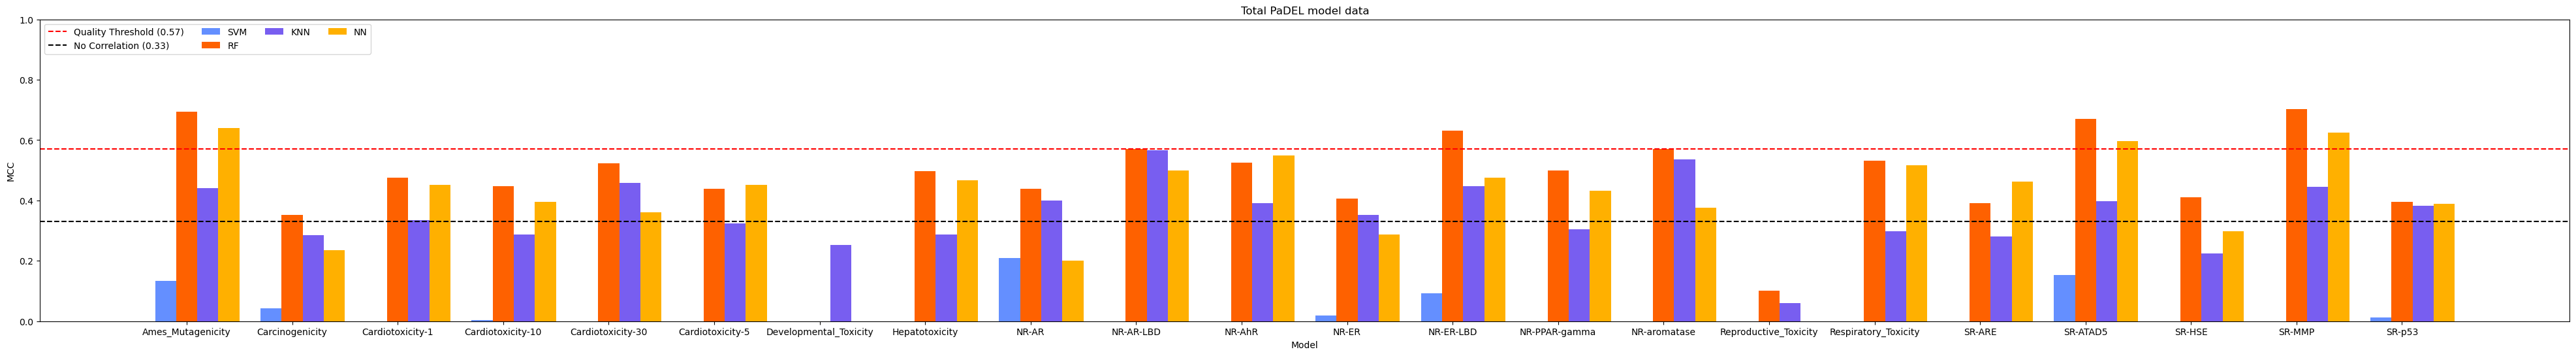

In [2]:
#Net Representation models
import matplotlib.pyplot as plt
loops = 0
for fpdf in datasets:
    df = fpdf.transpose()
    mcclist = df.values
    data = mcclist

    models = ('Sample Count', 'Positive Samples', 'Negative Samples')
    x = np.arange(len(datalist)) 
    width = 0.2  
    multiplier = 0

    fig, ax = plt.subplots(figsize=(50, 6))
    iter = 0
    for measurement in data:
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=index[multiplier], color = colors[iter])
        multiplier += 1
        iter += 1

    ax.set_ylabel('MCC')
    ax.set_xlabel('Model')
    name = 'Total ' + namelist[loops] + ' model data'
    ax.set_title(name)
    ax.set_xticks(x + width, datalist)
    
    ax.set_ylim(0, 1)
    plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Threshold (0.57)')
    plt.axhline(y=0.33, color='black', linestyle='--', label='No Correlation (0.33)')
    ax.legend(loc='upper left', ncols=4)

    plt.show()
    loops += 1

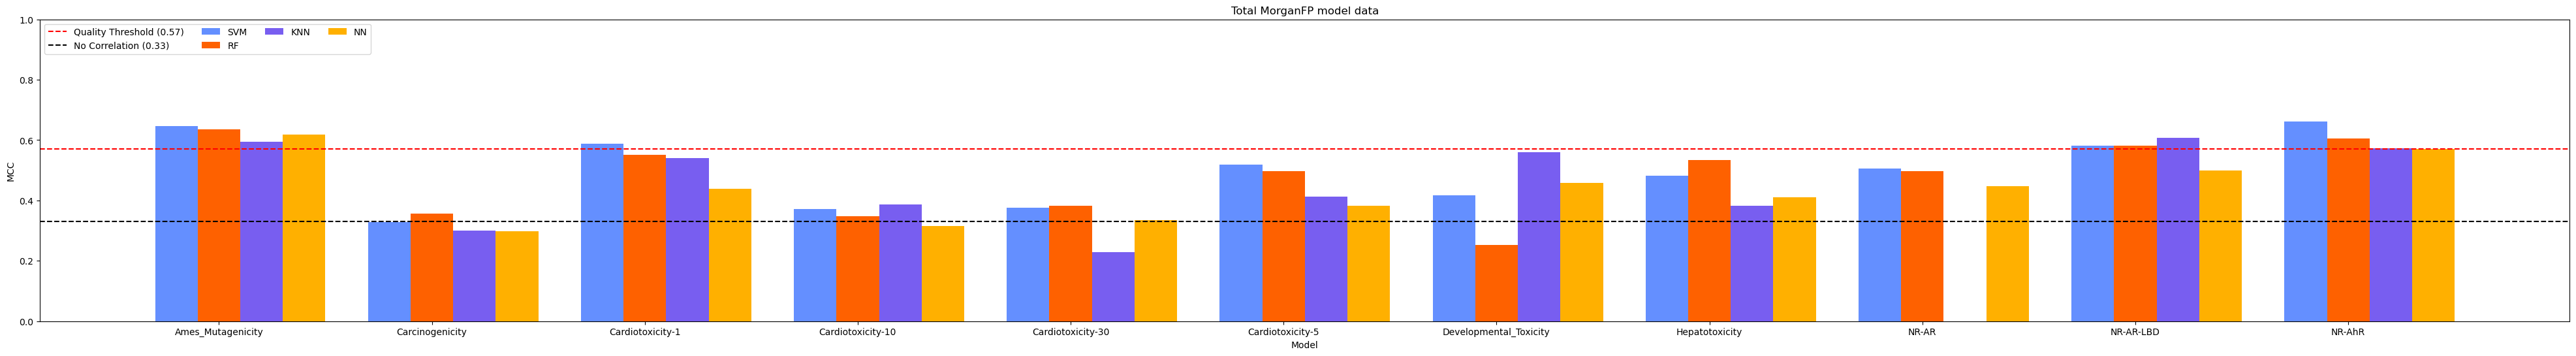

In [3]:
#Net Representation models
import matplotlib.pyplot as plt
loops = 0
fpdf = datasets[0][:11]
df = fpdf.transpose()
mcclist = df.values
data = mcclist

models = ('Sample Count', 'Positive Samples', 'Negative Samples')
x = np.arange(11) 
width = 0.2  
multiplier = 0

fig, ax = plt.subplots(figsize=(50, 6))
iter = 0
for measurement in data:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=index[multiplier], color = colors[iter])
    multiplier += 1
    iter += 1

ax.set_ylabel('MCC')
ax.set_xlabel('Model')
name = 'Total ' + namelist[loops] + ' model data'
ax.set_title(name)
ax.set_xticks(x + width, datalist[:11])

ax.set_ylim(0, 1)
plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Threshold (0.57)')
plt.axhline(y=0.33, color='black', linestyle='--', label='No Correlation (0.33)')
ax.legend(loc='upper left', ncols=4)

plt.show()
loops += 1

In [197]:
fpdf

,SVM,RF,KNN,NN
0,0.645418,0.634433,0.593972,0.618352
1,0.327792,0.356089,0.300006,0.297855
2,0.586831,0.551134,0.539582,0.438567
3,0.371115,0.348065,0.386310,0.314273
4,0.375668,0.382169,0.228814,0.334296
5,0.519310,0.497644,0.411566,0.381621
6,0.416667,0.251259,0.559431,0.458333
7,0.480855,0.533032,0.381898,0.410265
8,0.504538,0.496803,0.000000,0.447968
9,0.581843,0.581843,0.607366,0.499783


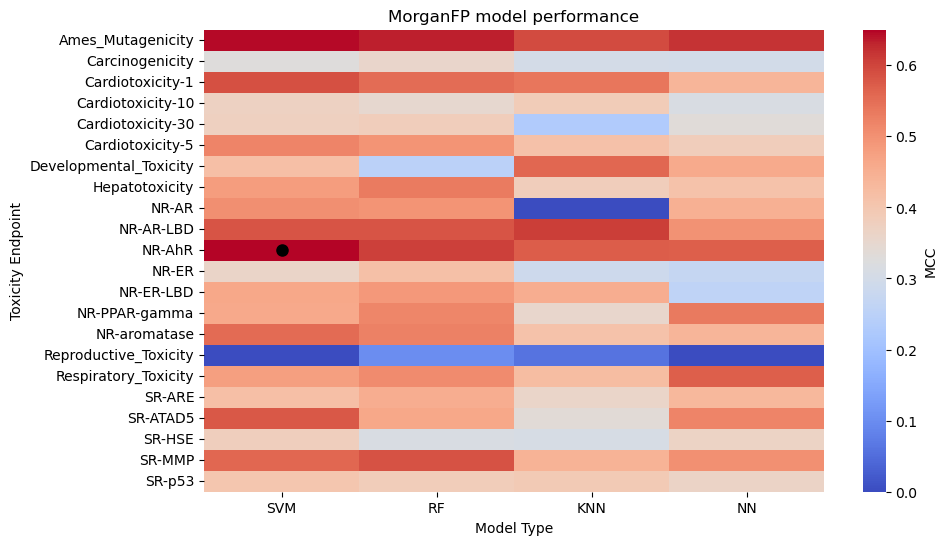

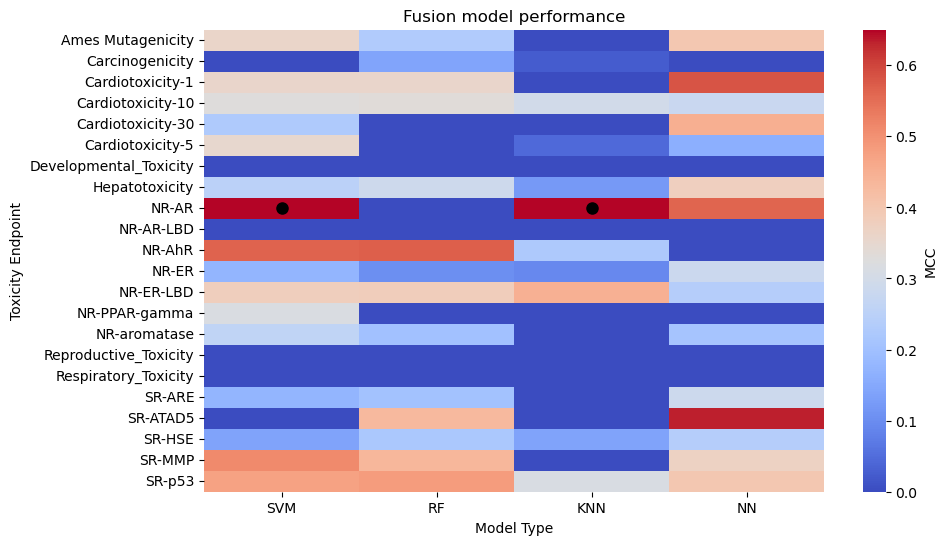

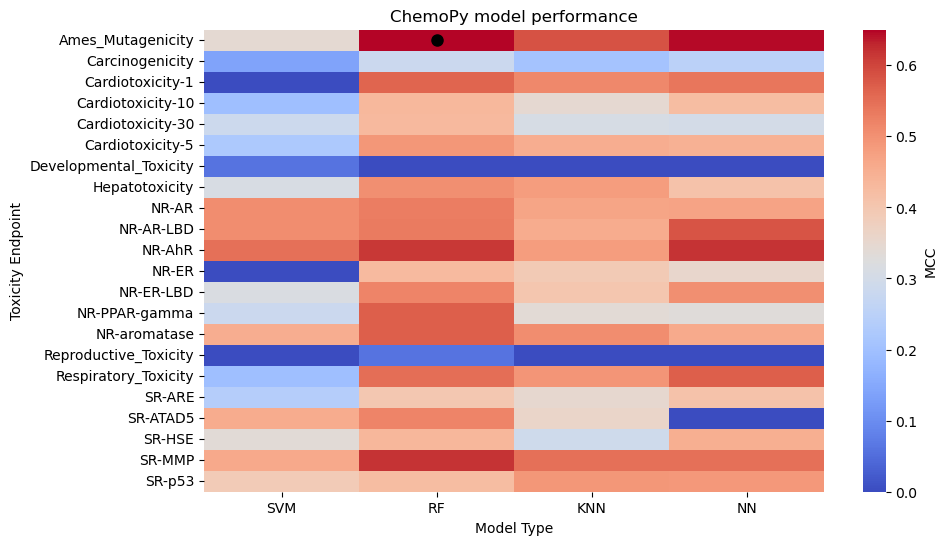

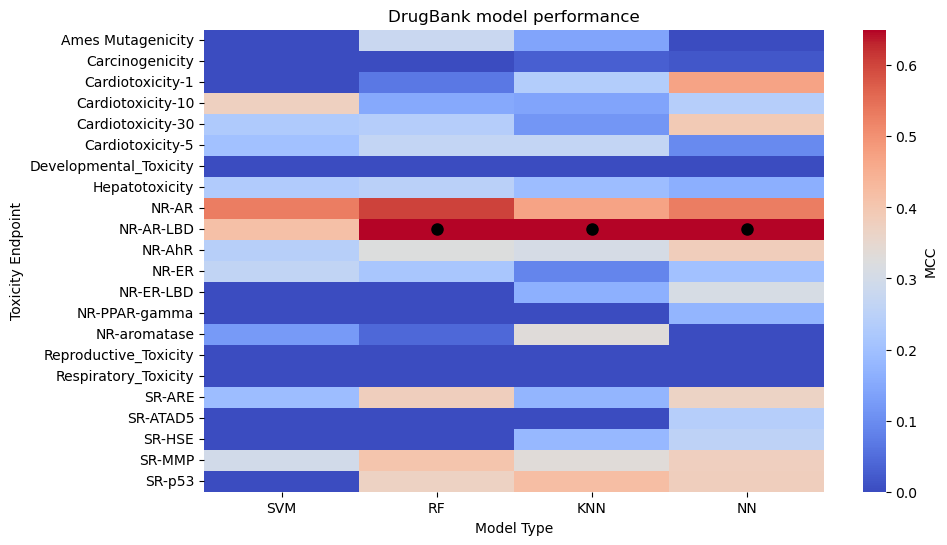

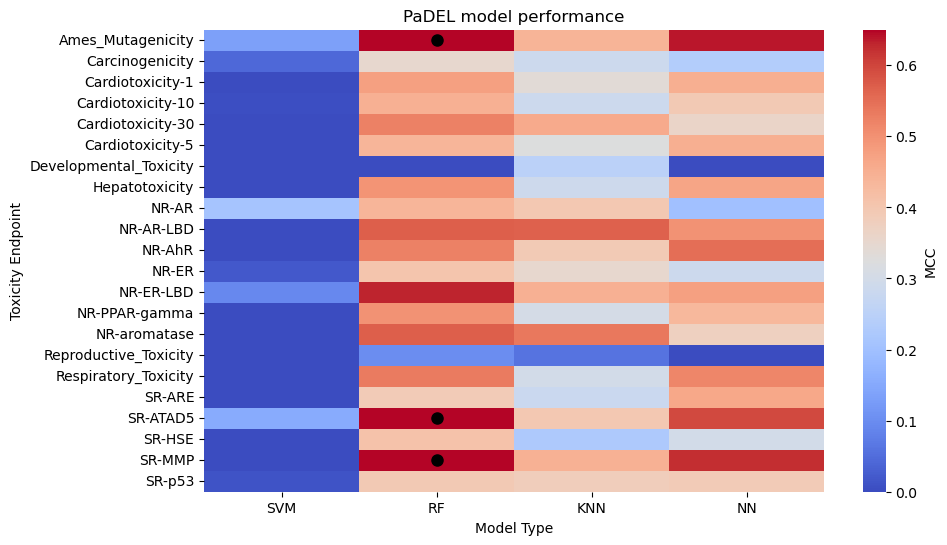

In [8]:
import seaborn as sns
loops = 0
for data in datasets:
    plt.figure(figsize=(10, 6))
#    data = datasets[1]
    ax = sns.heatmap(data, cmap = 'coolwarm', cbar_kws={'label': 'MCC'}, vmin = 0, vmax = 0.65)

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data.iloc[i, j] > 0.65:
                ax.plot(j + 0.5, i + 0.5, 'ko', markersize=8) 

    plt.xlabel('Model Type')
    plt.ylabel('Toxicity Endpoint')
    name = namelist[loops] + ' model performance'
    plt.title(name)
    plt.show()
    loops += 1

In [448]:
from scipy import stats
repvals = []
for representation in datasets:
    temp = []
    df = representation.values
    for model in df:
        for val in model:
            temp.append(val)
    repvals.append(temp)


h_statistic, p_value = stats.kruskal(*repvals)

print(f"H-statistic: {h_statistic}, p-value: {p_value}")

H-statistic: 93.29154576143216, p-value: 2.6304049309889784e-19


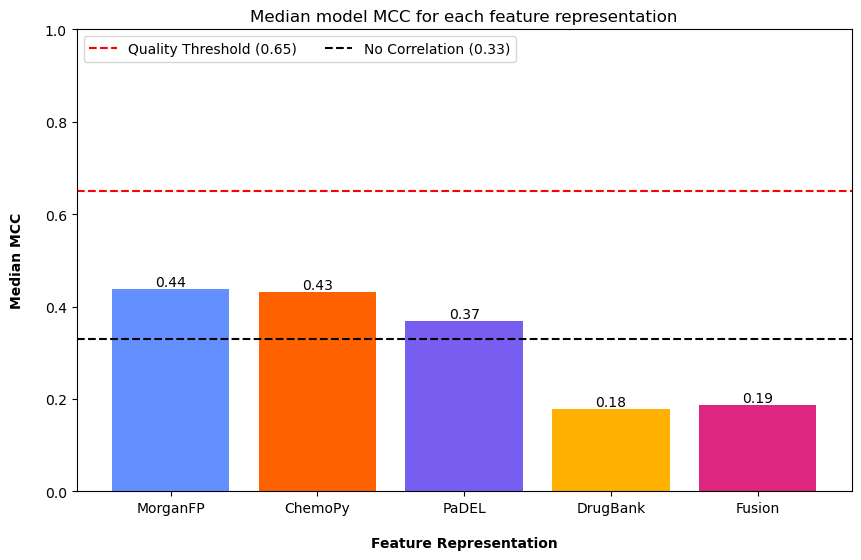

In [175]:
#averaging rep scores
import statistics
modelvals = [[], [], [], [], []]
count = 0
loops = 0
for representation in datasets:
    for modeltype in representation.values:
        for value in modeltype:
            modelvals[loops].append(value)
            count += 1
    loops += 1
            
modelaverages = []
modelsums = [0, 0, 0, 0, 0]
modelmeds = []
modelmax = []
loops = 0
for model in modelvals:
    modelmeds.append(statistics.median(model))
    modelmax.append(max(model))
    for vals in model:
        modelsums[loops] += vals
        
    loops += 1

for item in modelsums:
    modelaverages.append(item / (count/5))

#modelmeds = modelaverages
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar([namelist[0], namelist[2], namelist[4], namelist[3], namelist[1]], 
        [modelmeds[0], modelmeds[2], modelmeds[4], modelmeds[3], modelmeds[1]], color=colors)

ax.set_title('Median model MCC for each feature representation')
ax.set_xlabel('Feature Representation', fontweight = 'bold', labelpad=15)
ax.set_ylabel('Median MCC', fontweight = 'bold', labelpad=15)
ax.set_ylim(0, 1)
plt.axhline(y=0.65, color='r', linestyle='--', label='Quality Threshold (0.65)')
plt.axhline(y=0.33, color='black', linestyle='--', label='No Correlation (0.33)')
ax.legend(loc='upper left', ncols=4)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, 
             f'{round(yval, 2):.2f}', ha='center', va='bottom', fontsize=10)


# Show the plot
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(datasets[1], cmap = 'coolwarm', cbar_kws={'label': 'MCC'}, vmin = 0, vmax = 0.8)
plt.xlabel('Model Type')
plt.ylabel('Dataset')
plt.title('MorganFP-DrugBank Fusion model performance')
plt.show()

In [367]:
modeltypevals = [[], [], [], []]
for representation in datasets:
    count = 0
    supertemp = [[], [], [], []]
    df = representation.values
    for endpoint in df:
        iter = 0
        loops = 0
        temp = [[], [], [], []]
        for val in endpoint:
            temp[loops].append(val)
            loops += 1
        
        for set in temp:
            supertemp[iter].append(set[0])
            iter += 1
    for set in supertemp:
        modeltypevals[count].append(set)
        count += 1
modelset = []
for model in modeltypevals:
    test = pd.DataFrame(model)
    test.index = namelist
    test.columns = datasets[0].index
    test = test.transpose()
    modelset.append(test)

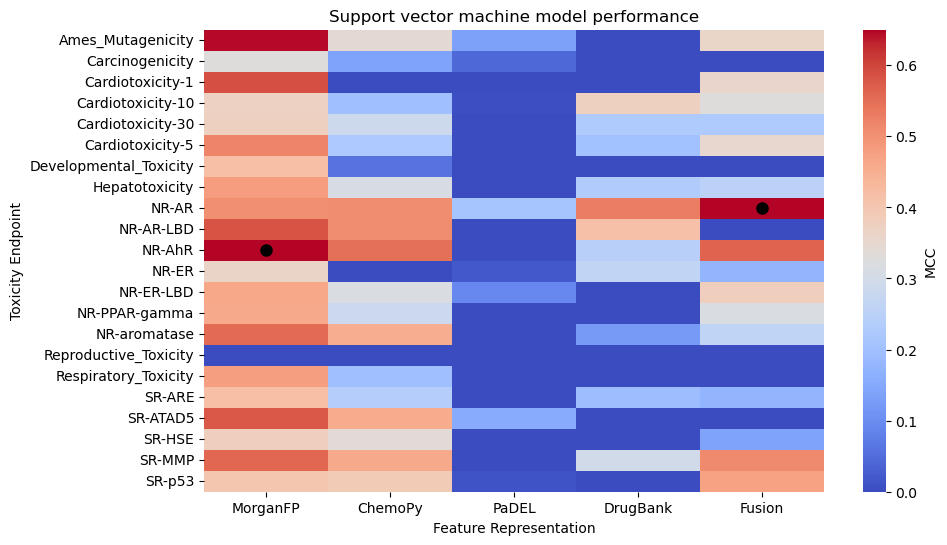

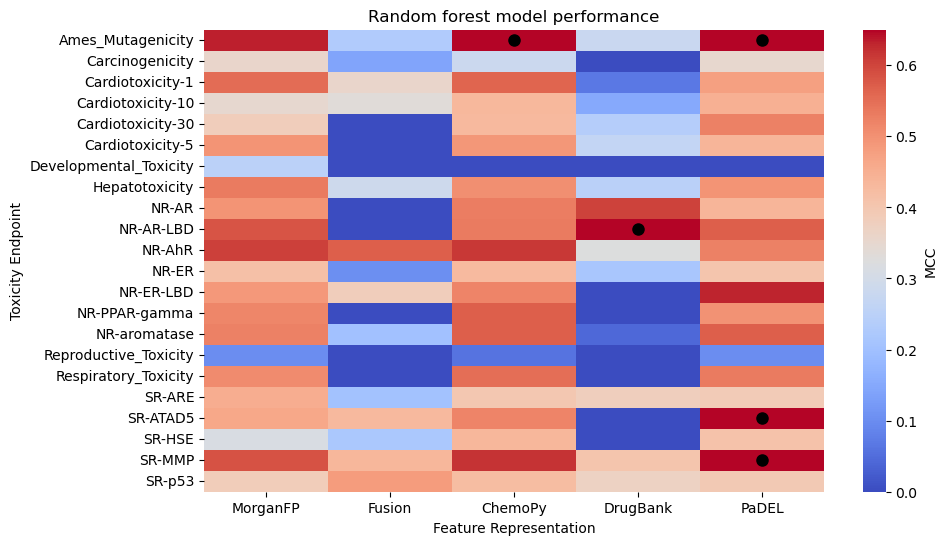

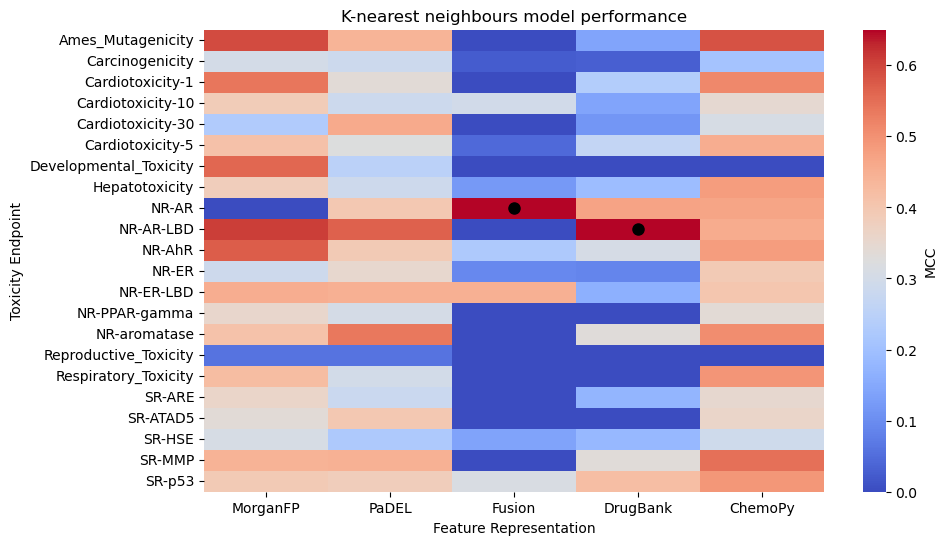

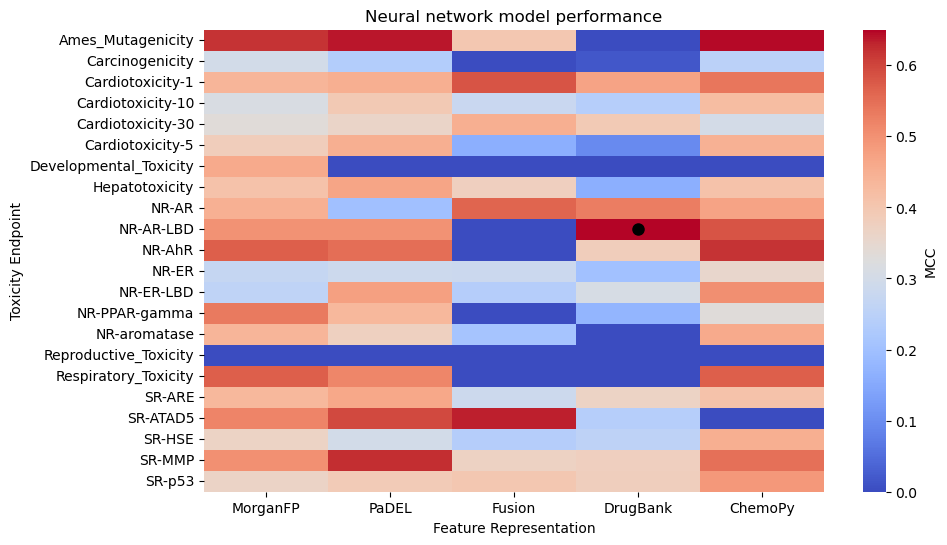

In [600]:
import seaborn as sns
names = ['Support vector machine', 'Random forest', 'K-nearest neighbours', 'Neural network']
data = modelset[0]
loops = 0
for data in modelset:
    plt.figure(figsize=(10, 6))
    data.iloc[:, [1, 4]] = data.iloc[:, [4, 1]].values
    data.columns.values[[1, 4]] = data.columns.values[[4, 1]]
    data.iloc[:, [1, 2]] = data.iloc[:, [2, 1]].values
    data.columns.values[[1, 2]] = data.columns.values[[2, 1]]
    ax = sns.heatmap(data, cmap = 'coolwarm', cbar_kws={'label': 'MCC'}, vmin = 0, vmax = 0.65)

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data.iloc[i, j] > 0.65:
                ax.plot(j + 0.5, i + 0.5, 'ko', markersize=8) 

    plt.xlabel('Feature Representation')
    plt.ylabel('Toxicity Endpoint')
    name = names[loops] + ' model performance'
    plt.title(name)
    loops += 1
    plt.show()

In [452]:
from scipy import stats
repvals = []
for representation in modelset:
    temp = []
    df = representation.values
    for model in df:
        for val in model:
            temp.append(val)
    repvals.append(temp)


h_statistic, p_value = stats.kruskal(*repvals)

print(f"H-statistic: {h_statistic}, p-value: {p_value}")

H-statistic: 23.837608525269676, p-value: 2.7007892884026123e-05


In [451]:
modelset[0]

,MorganFP,ChemoPy,PaDEL,DrugBank,Fusion
Ames_Mutagenicity,0.645418,0.342947,0.134123,0.000000,0.360341
Carcinogenicity,0.327792,0.137655,0.041442,0.000000,0.000000
Cardiotoxicity-1,0.586831,0.000000,0.000000,0.000000,0.357217
Cardiotoxicity-10,0.371115,0.197788,0.003923,0.373535,0.329655
Cardiotoxicity-30,0.375668,0.285069,0.000000,0.227710,0.227710
Cardiotoxicity-5,0.519310,0.221134,0.000000,0.201456,0.350469
Developmental_Toxicity,0.416667,0.058926,0.000000,0.000000,0.000000
Hepatotoxicity,0.480855,0.311396,-0.027751,0.230984,0.249981
NR-AR,0.504538,0.505569,0.209490,0.529414,0.732423
NR-AR-LBD,0.581843,0.505499,-0.009319,0.415862,0.000000


In [513]:
temp = pd.DataFrame()    
temp = pd.concat([temp, datasets[0]], axis = 1)
temp = pd.concat([temp, datasets[2]], axis = 1)
temp = pd.concat([temp, datasets[4]], axis = 1)
temp = pd.concat([temp, datasets[3]], axis = 1)
temp = pd.concat([temp, datasets[1]], axis = 1)

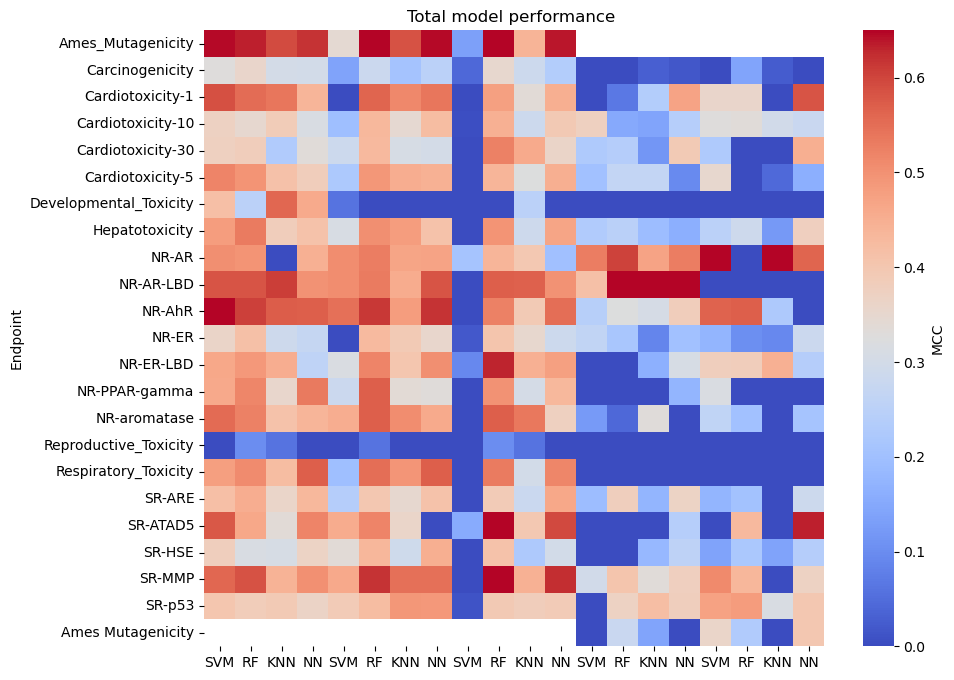

In [514]:
import seaborn as sns
plt.figure(figsize=(10, 8))
data = temp
sns.heatmap(data, cmap = 'coolwarm', cbar_kws={'label': 'MCC'}, vmin = 0, vmax = 0.65)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data.iloc[i, j] > 0.65:
            ax.plot(j + 0.5, i + 0.5, 'ko', markersize=8) 

plt.ylabel('Endpoint')
plt.title('Total model performance ')

plt.show()

In [554]:
endlist = []
loops = 0
endnames = []
for cat in temp.index:
    if 'Hepatotoxicity' in cat:
        endlist.append(loops)
        endnames.append(cat)
    loops += 1
        

In [560]:
temp

,SVM,RF,KNN,NN,SVM,RF,KNN,NN,SVM,RF,KNN,NN,SVM,RF,KNN,NN,SVM,RF,KNN,NN
Ames_Mutagenicity,0.645418,0.634433,0.593972,0.618352,0.342947,0.673788,0.585617,0.645140,0.134123,0.694065,0.440051,0.639403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carcinogenicity,0.327792,0.356089,0.300006,0.297855,0.137655,0.283432,0.205672,0.250899,0.041442,0.352292,0.284435,0.233994,0.000000,0.000000,0.030429,0.016038,0.000000,0.140859,0.023689,0.000000
Cardiotoxicity-1,0.586831,0.551134,0.539582,0.438567,0.000000,0.562687,0.515295,0.539582,0.000000,0.475548,0.335291,0.451504,0.000000,0.068041,0.235702,0.470757,0.357217,0.356348,0.000000,0.583333
Cardiotoxicity-10,0.371115,0.348065,0.386310,0.314273,0.197788,0.433555,0.346844,0.423273,0.003923,0.447599,0.285934,0.395641,0.373535,0.151411,0.141177,0.240065,0.329655,0.334252,0.295049,0.277139
Cardiotoxicity-30,0.375668,0.382169,0.228814,0.334296,0.285069,0.431327,0.308840,0.301693,0.000000,0.523277,0.457113,0.360675,0.227710,0.238416,0.115470,0.392792,0.227710,0.000000,-0.026491,0.449712
Cardiotoxicity-5,0.519310,0.497644,0.411566,0.381621,0.221134,0.492231,0.453008,0.445291,0.000000,0.438970,0.323111,0.451111,0.201456,0.266293,0.266293,0.096144,0.350469,-0.011881,0.044699,0.162437
Developmental_Toxicity,0.416667,0.251259,0.559431,0.458333,0.058926,0.000000,-0.166667,0.000000,0.000000,-0.344265,0.251259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hepatotoxicity,0.480855,0.533032,0.381898,0.410265,0.311396,0.504801,0.482027,0.409571,-0.027751,0.496345,0.287734,0.467566,0.230984,0.246822,0.191692,0.160319,0.249981,0.288512,0.120030,0.377934
NR-AR,0.504538,0.496803,0.000000,0.447968,0.505569,0.529849,0.467330,0.471048,0.209490,0.438522,0.398612,0.200256,0.529414,0.602862,0.471144,0.530145,0.732423,0.000000,0.732423,0.563189
NR-AR-LBD,0.581843,0.581843,0.607366,0.499783,0.505499,0.531695,0.455190,0.583452,-0.009319,0.570806,0.567081,0.499783,0.415862,0.727823,0.838713,0.788860,0.000000,0.000000,0.000000,0.000000


In [556]:
averages = []
for item in endlist:
    df = temp.iloc[item]
    averages.append(sum(df) / len(df))

In [557]:
loops = 0
for item in averages:
    print(endnames[loops], item)
    loops += 1

Hepatotoxicity 0.33020065549482946


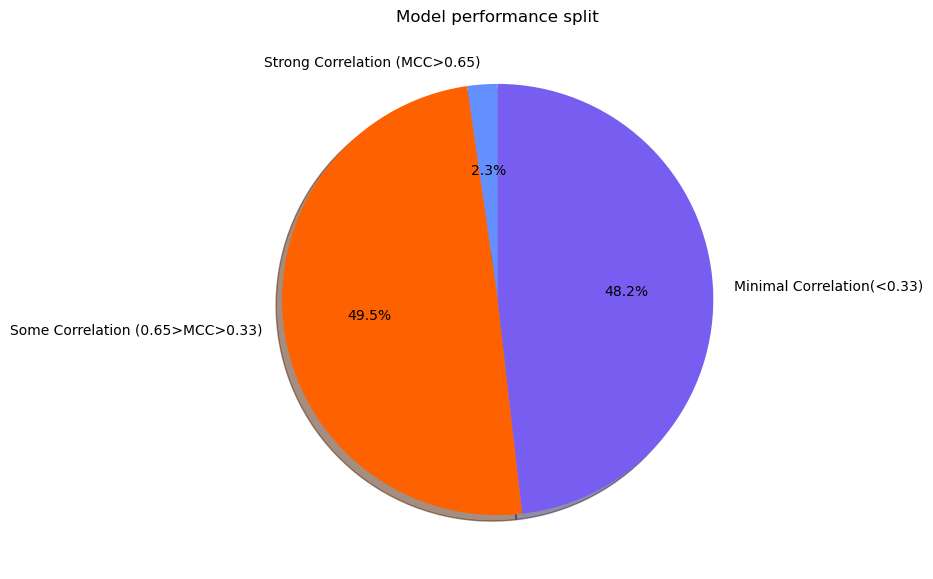

In [457]:
#plotting total vals
totalvals = []
for model in modelvals:
    for valie in model:
        totalvals.append(valie)
great = 0
okay = 0
bad = 0
for item in totalvals:
    if item > 0.65:
        great += 1
    elif item > 0.33:
        okay += 1
    else:
        bad += 1

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie([great, okay, bad], 
       labels=['Strong Correlation (MCC>0.65)', 
               'Some Correlation (0.65>MCC>0.33)', 
               'Minimal Correlation(<0.33)'],
       shadow=True,
       colors=colors,
       startangle=90,
       autopct='%1.1f%%' 
      )
plt.title('Model performance split')
plt.show()

In [460]:
modelvals

[[0.6454178938291891,
  0.3277919631486701,
  0.5868310831530859,
  0.3711153521238838,
  0.375667507047237,
  0.5193099564030418,
  0.4166666666666667,
  0.480854877125666,
  0.5045381731276043,
  0.5818429184443191,
  0.6603887227797506,
  0.360980546963335,
  0.4627017005358065,
  0.4615978730517827,
  0.5545779138333476,
  0.0,
  0.4781752769308021,
  0.4185142511351999,
  0.5775064742878283,
  0.3804109233975316,
  0.5588983394823899,
  0.4012427832875904,
  0.3603411454626667,
  0.0,
  0.3572172541558802,
  0.3296551724137931,
  0.2277100170213244,
  0.3504688161892211,
  0.0,
  0.2499809249133932,
  0.7324231214502538,
  0.0,
  0.5643939393939394,
  0.1728252824550708,
  0.3794016054674684,
  0.3162277660168379,
  0.260423717853257,
  0.0,
  0.0,
  0.1737179130264022,
  0.0,
  0.1372215512369386,
  0.5122056727163324,
  0.4735570640442169,
  0.3429471661974262,
  0.1376549307744318,
  0.0,
  0.1977879493537121,
  0.2850687702901274,
  0.2211342556388944,
  0.0589255650988789,
  

In [90]:
modelaverages

[0.42680456862300675,
 0.2027046241747016,
 0.3806710303357414,
 0.19575134853449913,
 0.3064055332159148]

In [91]:
modelmeds

[0.4378109814628249,
 0.1872696358593193,
 0.43244119753061117,
 0.17797987006388322,
 0.3679180381244388]

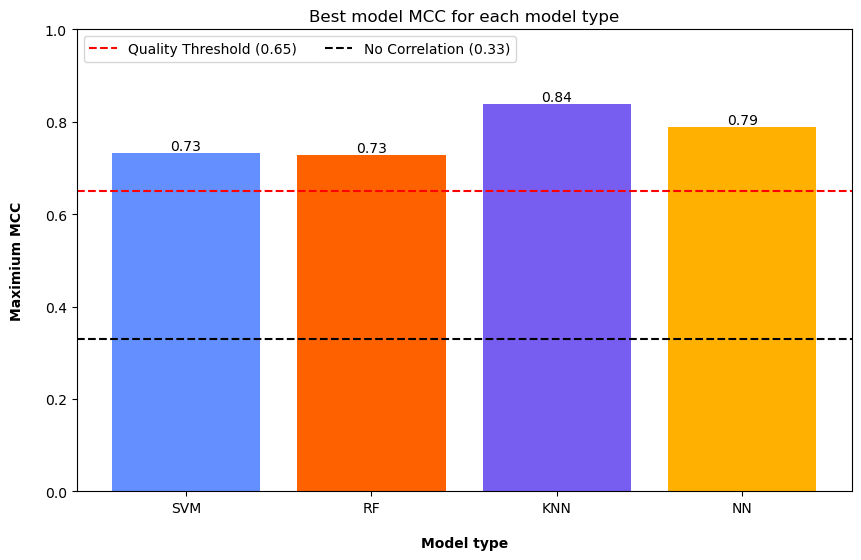

In [226]:
#averaging model scores
import statistics
modelvals = [[], [], [], []]
count = 0
for representation in datasets:
    for modeltype in representation.values:
        loops = 0
        for value in modeltype:
            modelvals[loops].append(value)
            loops += 1
            count += 1
            
modelaverages = []
modelsums = [0, 0, 0, 0]
modelmeds = []
modelmax = []
loops = 0
for model in modelvals:
    modelmeds.append(statistics.median(model))
    modelmax.append(max(model))
    for vals in model:
        modelsums[loops] += vals
        
    loops += 1

for item in modelsums:
    modelaverages.append(item / (count/4))
    
#modelmeds = modelaverages
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(index, 
        modelmax, color=colors)

ax.set_title('Best model MCC for each model type')
ax.set_xlabel('Model type', fontweight = 'bold', labelpad=15)
ax.set_ylabel('Maximium MCC', fontweight = 'bold', labelpad=15)
ax.set_ylim(0, 1)
plt.axhline(y=0.65, color='r', linestyle='--', label='Quality Threshold (0.65)')
plt.axhline(y=0.33, color='black', linestyle='--', label='No Correlation (0.33)')
ax.legend(loc='upper left', ncols=4)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, 
             f'{round(yval, 2):.2f}', ha='center', va='bottom', fontsize=10)


# Show the plot
plt.show()

In [81]:
modelmeds

[0.2277100170213244,
 0.4084053475677145,
 0.30923980332404166,
 0.3782499145577388]

In [79]:
modelaverages

[0.23310892475486084,
 0.3522363815929284,
 0.28457855444315844,
 0.33994582311614324]

In [58]:
datasets[0].values[0]

array([0.64541789, 0.63443306, 0.59397232, 0.61835207])

In [39]:
namelist

['MorganFP', 'Fusion', 'ChemoPy', 'DrugBank', 'PaDEL']